About Dataset

**Context**

This is image data of Natural Scenes around the world.

**Content**


This Data contains around 25k images of size 150x150 distributed under 6 categories.

{'buildings' -> 0,
'forest' -> 1,
'glacier' -> 2,
'mountain' -> 3,
'sea' -> 4,
'street' -> 5 }

The Train, Test and Prediction data is separated in each zip files. There are around 14k images in Train, 3k in Test and 7k in Prediction.

This data was initially published on https://datahack.analyticsvidhya.com by Intel to host a Image classification Challenge.

Acknowledgements
Thanks to https://datahack.analyticsvidhya.com for the challenge and Intel for the Data

**Inspiration**

Want to build powerful Neural Network that can classify these images with more accuracy.


For the first model, I used tiny vgg architecture.

Then I used 3 models from TensorFlow Hub:

mobilenet_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/5"

resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"


With the efficientnet_model, I reached to approximately 93% val_accuracy, which make it the best model between 3.

In [1]:
! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d puneet6060/intel-image-classification

 93% 321M/346M [00:01<00:00, 197MB/s]
100% 346M/346M [00:02<00:00, 174MB/s]


In [2]:
import zipfile

zip_ref = zipfile.ZipFile("intel-image-classification.zip")
zip_ref.extractall("intel-image-classification")
zip_ref.close()

In [3]:
# Walk through intel-image-classification directory and list number of files
import os
for dirpath, dirnames, filenames in os.walk("intel-image-classification"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 3 directories and 0 images in 'intel-image-classification'.
There are 1 directories and 0 images in 'intel-image-classification/seg_test'.
There are 6 directories and 0 images in 'intel-image-classification/seg_test/seg_test'.
There are 0 directories and 525 images in 'intel-image-classification/seg_test/seg_test/mountain'.
There are 0 directories and 474 images in 'intel-image-classification/seg_test/seg_test/forest'.
There are 0 directories and 437 images in 'intel-image-classification/seg_test/seg_test/buildings'.
There are 0 directories and 553 images in 'intel-image-classification/seg_test/seg_test/glacier'.
There are 0 directories and 510 images in 'intel-image-classification/seg_test/seg_test/sea'.
There are 0 directories and 501 images in 'intel-image-classification/seg_test/seg_test/street'.
There are 1 directories and 0 images in 'intel-image-classification/seg_pred'.
There are 0 directories and 7301 images in 'intel-image-classification/seg_pred/seg_pred'.
There ar

In [4]:
import pathlib
import numpy as np
data_dir = pathlib.Path("intel-image-classification/seg_train/seg_train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['buildings' 'forest' 'glacier' 'mountain' 'sea' 'street']


In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import cv2
import numpy as np
  
def view_random_image(target_dir, target_class):
  target_folder = target_dir + "/" + target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + "/" + random_image[0])
  img = cv2.resize(img, (224, 224))
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")
  return img

Image shape: (224, 224, 3)


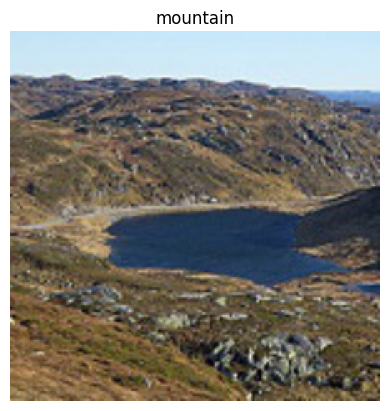

In [6]:
img = view_random_image(target_dir="intel-image-classification/seg_train/seg_train/",
                        target_class="mountain")

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "intel-image-classification/seg_train/seg_train/"
test_dir = "intel-image-classification/seg_test/seg_test/" 

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               seed=42)

test_data = test_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               seed=42)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [8]:
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3,
                         activation="relu", 
                         input_shape=(224, 224, 3)), 
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, 
                            padding="valid"), 
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), 
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(6, activation="softmax") 
])

model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/5
439/439 [==============================] - 49s 83ms/step - loss: 0.9903 - accuracy: 0.6212 - val_loss: 0.7703 - val_accuracy: 0.7143
Epoch 2/5
439/439 [==============================] - 39s 90ms/step - loss: 0.6649 - accuracy: 0.7594 - val_loss: 0.7042 - val_accuracy: 0.7540
Epoch 3/5
439/439 [==============================] - 36s 82ms/step - loss: 0.4752 - accuracy: 0.8354 - val_loss: 0.7549 - val_accuracy: 0.7430
Epoch 4/5
439/439 [==============================] - 36s 83ms/step - loss: 0.2943 - accuracy: 0.9022 - val_loss: 0.9361 - val_accuracy: 0.7307
Epoch 5/5
439/439 [==============================] - 35s 79ms/step - loss: 0.1743 - accuracy: 0.9458 - val_loss: 0.9871 - val_accuracy: 0.7610


In [9]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [10]:
def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]
  epochs = range(len(history.history["loss"]))

  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("Loss")
  plt.xlabel("Epoch")
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label="accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epoch")
  plt.legend()

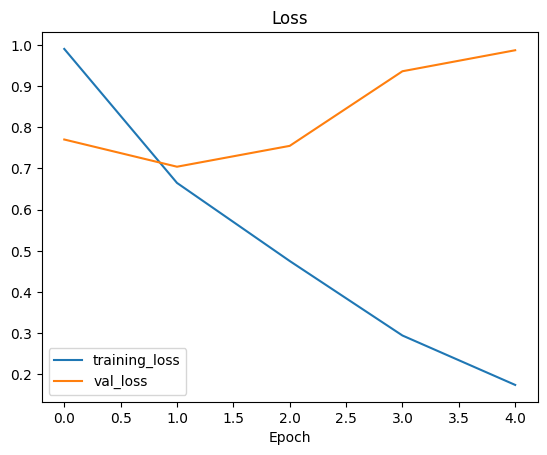

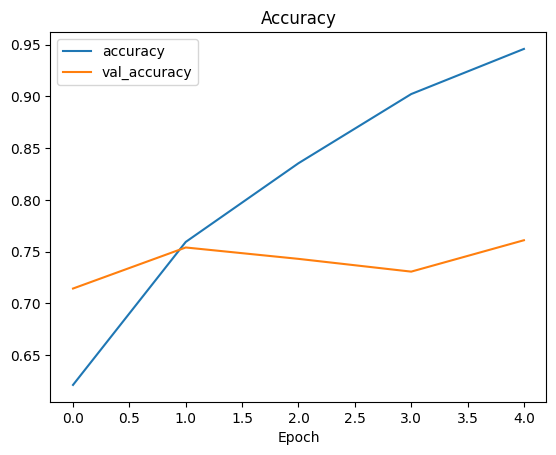

In [11]:
plot_loss_curves(history_1)

In [22]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import cv2
import numpy as np
  
def view_and_predict(model, target_folder):
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + "/" + random_image[0])
  img = cv2.resize(img, (224, 224))
  plt.imshow(img)
  plt.title("Predict")
  plt.axis("off");

  predict_arg = model.predict(
    tf.expand_dims(img/255., axis=0),
    batch_size=None,
    verbose="auto",
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
  )
  print(f" Prediction: This is a {class_names[predict_arg.argmax()]}")



1/1 [==============================] - 0s 22ms/step
 Prediction: This is a glacier


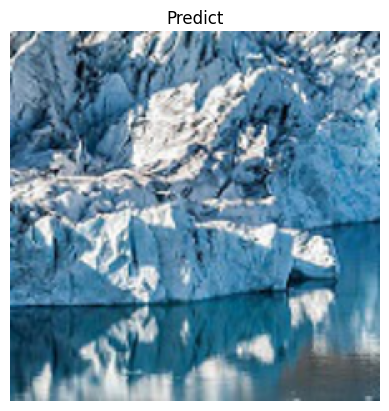

In [24]:
view_and_predict(model_1, target_folder="intel-image-classification/seg_pred/seg_pred/")

In [14]:
import tensorflow_hub as hub
from tensorflow.keras import layers

mobilenet_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/5"
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"


IMAGE_SHAPE = (224, 224)

In [15]:
def create_model(model_url, num_classes=10):
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False,
                                           name="feature_extractor_layer",
                                           input_shape=IMAGE_SHAPE+(3,))
  model = tf.keras.Sequential([
      feature_extractor_layer,
      layers.Dense(num_classes, activation="softmax", name="output_layer")
  ])

  return model

In [16]:
mobilenet_model = create_model(mobilenet_url, num_classes=train_data.num_classes)
mobilenet_model.compile(loss="categorical_crossentropy",
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["accuracy"])
mobilenet_history = mobilenet_model.fit(train_data,
                                        epochs=5,
                                        steps_per_epoch=len(train_data),
                                        validation_data=test_data,
                                        validation_steps=len(test_data))

Epoch 1/5
439/439 [==============================] - 50s 91ms/step - loss: 0.3351 - accuracy: 0.8804 - val_loss: 0.2560 - val_accuracy: 0.9020
Epoch 2/5
439/439 [==============================] - 43s 97ms/step - loss: 0.2231 - accuracy: 0.9198 - val_loss: 0.2294 - val_accuracy: 0.9173
Epoch 3/5
439/439 [==============================] - 35s 80ms/step - loss: 0.2002 - accuracy: 0.9270 - val_loss: 0.2238 - val_accuracy: 0.9170
Epoch 4/5
439/439 [==============================] - 37s 84ms/step - loss: 0.1824 - accuracy: 0.9332 - val_loss: 0.2223 - val_accuracy: 0.9177
Epoch 5/5
439/439 [==============================] - 40s 91ms/step - loss: 0.1700 - accuracy: 0.9395 - val_loss: 0.2274 - val_accuracy: 0.9167


In [26]:
mobilenet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extractor_layer (Ke  (None, 1280)             2257984   
 rasLayer)                                                       
                                                                 
 output_layer (Dense)        (None, 6)                 7686      
                                                                 
Total params: 2,265,670
Trainable params: 7,686
Non-trainable params: 2,257,984
_________________________________________________________________


1/1 [==============================] - 1s 829ms/step
 Prediction: This is a glacier


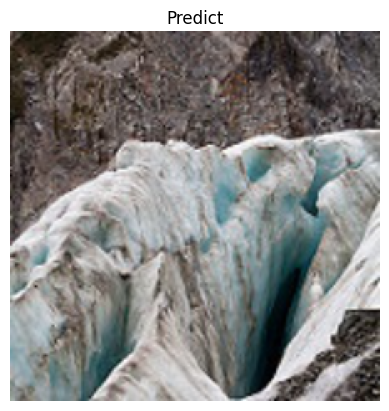

In [31]:
view_and_predict(mobilenet_model, target_folder="intel-image-classification/seg_pred/seg_pred/")

In [19]:
efficientnet_model = create_model(model_url=efficientnet_url, 
                                  num_classes=train_data.num_classes)
efficientnet_model.compile(loss='categorical_crossentropy',
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=['accuracy'])
efficientnet_history = efficientnet_model.fit(train_data,
                                              epochs=5,
                                              steps_per_epoch=len(train_data),
                                              validation_data=test_data,
                                              validation_steps=len(test_data))

Epoch 1/5
439/439 [==============================] - 49s 90ms/step - loss: 0.3191 - accuracy: 0.8971 - val_loss: 0.2222 - val_accuracy: 0.9183
Epoch 2/5
439/439 [==============================] - 37s 85ms/step - loss: 0.1958 - accuracy: 0.9306 - val_loss: 0.2019 - val_accuracy: 0.9263
Epoch 3/5
439/439 [==============================] - 38s 87ms/step - loss: 0.1744 - accuracy: 0.9374 - val_loss: 0.2023 - val_accuracy: 0.9270
Epoch 4/5
439/439 [==============================] - 38s 87ms/step - loss: 0.1597 - accuracy: 0.9436 - val_loss: 0.1904 - val_accuracy: 0.9327
Epoch 5/5
439/439 [==============================] - 39s 90ms/step - loss: 0.1490 - accuracy: 0.9488 - val_loss: 0.1949 - val_accuracy: 0.9293


In [27]:
efficientnet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extractor_layer (Ke  (None, 1280)             4049564   
 rasLayer)                                                       
                                                                 
 output_layer (Dense)        (None, 6)                 7686      
                                                                 
Total params: 4,057,250
Trainable params: 7,686
Non-trainable params: 4,049,564
_________________________________________________________________


1/1 [==============================] - 0s 24ms/step
 Prediction: This is a sea


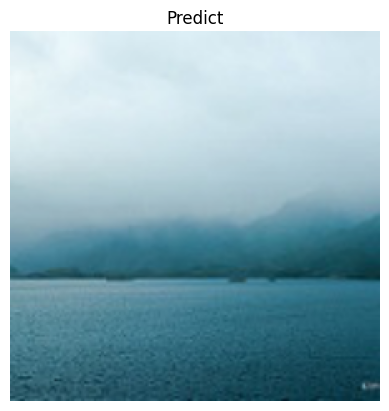

In [36]:
view_and_predict(efficientnet_model, target_folder="intel-image-classification/seg_pred/seg_pred/")

In [20]:
resnet_model = create_model(model_url=resnet_url, 
                                  num_classes=train_data.num_classes)
resnet_model.compile(loss='categorical_crossentropy',
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=['accuracy'])
resnet_history = resnet_model.fit(train_data,
                                              epochs=5,
                                              steps_per_epoch=len(train_data),
                                              validation_data=test_data,
                                              validation_steps=len(test_data))

Epoch 1/5
439/439 [==============================] - 58s 118ms/step - loss: 0.3313 - accuracy: 0.8822 - val_loss: 0.2291 - val_accuracy: 0.9157
Epoch 2/5
439/439 [==============================] - 50s 114ms/step - loss: 0.2017 - accuracy: 0.9263 - val_loss: 0.2109 - val_accuracy: 0.9197
Epoch 3/5
439/439 [==============================] - 49s 112ms/step - loss: 0.1743 - accuracy: 0.9357 - val_loss: 0.2179 - val_accuracy: 0.9200
Epoch 4/5
439/439 [==============================] - 51s 117ms/step - loss: 0.1554 - accuracy: 0.9426 - val_loss: 0.2036 - val_accuracy: 0.9230
Epoch 5/5
439/439 [==============================] - 48s 109ms/step - loss: 0.1420 - accuracy: 0.9496 - val_loss: 0.2048 - val_accuracy: 0.9193


In [29]:
resnet_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extractor_layer (Ke  (None, 2048)             23564800  
 rasLayer)                                                       
                                                                 
 output_layer (Dense)        (None, 6)                 12294     
                                                                 
Total params: 23,577,094
Trainable params: 12,294
Non-trainable params: 23,564,800
_________________________________________________________________


1/1 [==============================] - 0s 136ms/step
 Prediction: This is a forest


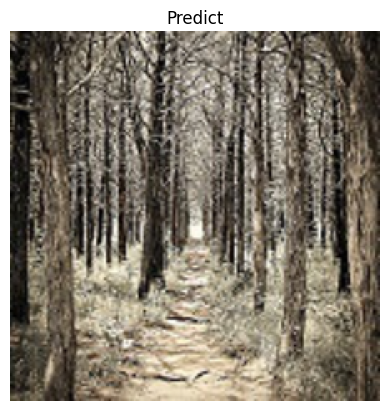

In [33]:
view_and_predict(resnet_model, target_folder="intel-image-classification/seg_pred/seg_pred/")